In [1]:
%run algo.py

Loading Model...


In [ ]:
%run ppo.py
%run discriminator.py 
logger = Logger()
# discrim = SmallD(logger, s = 11, a = 3)
#discrim = SmallD_S(logger, s = 11)
# ppo  = PPO(logger, bc_loss = "MSE", parallel = 2000, horizon = 10)
#ppo.train_bc(e_states,e_actions, geometric = True, train_step = 1500, progress = True)
#evaluate(ppo.policy, env)
#rollout_single_ppo(ppo, model, discrim, e_states, states, logger)
# algo2(ppo, discrim, model, env, states, e_states,e_actions, logger, s_a = True)
#algo1(ppo, discrim, env, obs,acts)

#including buffer states
logger = Logger()
discrim = SmallD_S(logger, s = 11,lipschitz = 0.05, loss = 'linear')
ppo  = PPO(logger, bc_loss = "logprob", parallel = 5000, horizon = 10, geometric = True,
bc_ppo_train_step = 1)
algo2(ppo, discrim, model, env, states, actions, e_states,e_actions, logger, s_a = False,
update_bc = True)


Discrim rewards [-0.15989983 -0.15563296 -0.15844344 -0.15682271 -0.16159804 -0.15976155
 -0.1643287  -0.16638543 -0.17138499 -0.17746626] -1.6317239
0
penalty 0.10440214
model logprobs 42.157932
model loss -7.700924464634487
model loss std 0.49325180514544237
rollout 0 rew,statem,statestd,penalty (-0.15989984571933746, 0.09215341118670446, 1.9497066257930635, 0.08723295)
state mean -0.024611758
state std 1.8797191
rollout 1 rew,statem,statestd,penalty (-0.15563295781612396, 0.07054486, 1.9190794, 0.082711734)
rollout 2 rew,statem,statestd,penalty (-0.15844343602657318, 0.053355135, 1.8945863, 0.08527251)
rollout 3 rew,statem,statestd,penalty (-0.15682269632816315, 0.040129047, 1.8776169, 0.0836348)
rollout 4 rew,statem,statestd,penalty (-0.16159804165363312, 0.03091275, 1.8683895, 0.08837307)
rollout 5 rew,statem,statestd,penalty (-0.15976154804229736, 0.022583239, 1.8634634, 0.08661626)
rollout 6 rew,statem,statestd,penalty (-0.1643286943435669, 0.010018031, 1.863304, 0.09117251)
rol

Discrim rewards [-0.16562857 -0.16355579 -0.16735163 -0.16910608 -0.17141934 -0.1766437
 -0.18936497 -0.2024351  -0.20170273 -0.21099624] -1.818204
5
penalty 0.15450446
model logprobs 40.84291
model loss -7.026766572679792
model loss std 0.5401867855001223
rollout 0 rew,statem,statestd,penalty (-0.1656285673379898, 0.09636281638442432, 1.926556491663906, 0.110503465)
state mean 0.017556304
state std 2.1169796
rollout 1 rew,statem,statestd,penalty (-0.1635558158159256, 0.17772591, 1.9164667, 0.11244636)
rollout 2 rew,statem,statestd,penalty (-0.1673516184091568, 0.1763064, 1.9203446, 0.11614474)
rollout 3 rew,statem,statestd,penalty (-0.16910606622695923, 0.15021381, 1.9357513, 0.11657041)
rollout 4 rew,statem,statestd,penalty (-0.17141932249069214, 0.1279661, 1.956841, 0.11815488)
rollout 5 rew,statem,statestd,penalty (-0.17664369940757751, 0.10490815, 1.9833297, 0.12269929)
rollout 6 rew,statem,statestd,penalty (-0.189364954829216, 0.080968715, 2.0191278, 0.13486964)
rollout 7 rew,sta

Discrim rewards [-0.13273598 -0.12354355 -0.12485452 -0.12901038 -0.13187248 -0.14542189
 -0.14804402 -0.15092336 -0.15873103 -0.16035546] -1.4054927
10
penalty 0.13469827
model logprobs 41.36578
model loss -7.76998724256243
model loss std 0.43339489974890905
rollout 0 rew,statem,statestd,penalty (-0.1327359825372696, 0.09871375685021164, 1.909375780041203, 0.123009935)
state mean 0.053688303
state std 2.0208619
rollout 1 rew,statem,statestd,penalty (-0.12354355305433273, 0.17953297, 1.8807188, 0.11842677)
rollout 2 rew,statem,statestd,penalty (-0.12485451996326447, 0.17354679, 1.8714864, 0.115963526)
rollout 3 rew,statem,statestd,penalty (-0.1290103942155838, 0.1552977, 1.8770108, 0.116122924)
rollout 4 rew,statem,statestd,penalty (-0.13187247514724731, 0.13495645, 1.8894819, 0.11533948)
rollout 5 rew,statem,statestd,penalty (-0.14542190730571747, 0.11032703, 1.9110469, 0.12565096)
rollout 6 rew,statem,statestd,penalty (-0.14804401993751526, 0.094275355, 1.9319152, 0.12572668)
rollout

Discrim rewards [-0.08787377 -0.08465374 -0.09328714 -0.09713585 -0.10701969 -0.11167859
 -0.12366061 -0.12498251 -0.13203901 -0.13584518] -1.0981761
15
penalty 0.1437063
model logprobs 41.16319
model loss -7.595543248312814
model loss std 0.5090515886638827
rollout 0 rew,statem,statestd,penalty (-0.08787377178668976, 0.0920046413963096, 1.944062918114023, 0.12650293)
state mean 0.06356386
state std 2.0404615
rollout 1 rew,statem,statestd,penalty (-0.08465373516082764, 0.16000997, 1.9022573, 0.12269192)
rollout 2 rew,statem,statestd,penalty (-0.09328713268041611, 0.15440665, 1.8831307, 0.122580774)
rollout 3 rew,statem,statestd,penalty (-0.09713585674762726, 0.13866435, 1.8813201, 0.118533984)
rollout 4 rew,statem,statestd,penalty (-0.10701969265937805, 0.12138934, 1.8946421, 0.123801574)
rollout 5 rew,statem,statestd,penalty (-0.1116785779595375, 0.107273094, 1.9262921, 0.12672064)
rollout 6 rew,statem,statestd,penalty (-0.123660609126091, 0.09648179, 1.9596533, 0.13690063)
rollout 7 

Discrim rewards [-0.09562851 -0.08750959 -0.1103752  -0.11717068 -0.12690012 -0.13649647
 -0.1419389  -0.1487499  -0.15451299 -0.15410218] -1.2733846
20
penalty 0.14643785
model logprobs 41.24479
model loss -7.7343636240277975
model loss std 0.4083627038043657
rollout 0 rew,statem,statestd,penalty (-0.0956285148859024, 0.09125894337236097, 1.9424950182139158, 0.13954683)
state mean 0.027106633
state std 2.0443094
rollout 1 rew,statem,statestd,penalty (-0.08750957995653152, 0.12674503, 1.9041501, 0.124090575)
rollout 2 rew,statem,statestd,penalty (-0.11037518084049225, 0.10916938, 1.8916589, 0.13173988)
rollout 3 rew,statem,statestd,penalty (-0.11717067658901215, 0.09346717, 1.8961273, 0.12706658)
rollout 4 rew,statem,statestd,penalty (-0.12690012156963348, 0.07523414, 1.9115385, 0.1299585)
rollout 5 rew,statem,statestd,penalty (-0.13649646937847137, 0.06167971, 1.9317181, 0.13390072)
rollout 6 rew,statem,statestd,penalty (-0.14193889498710632, 0.047158998, 1.9556156, 0.1347563)
rollout

Discrim rewards [-0.07345107 -0.07797192 -0.10158778 -0.12172192 -0.12997596 -0.1447963
 -0.15784046 -0.1645773  -0.16798694 -0.17711431] -1.317024
25
penalty 0.15128425
model logprobs 41.11684
model loss -7.5102522032601495
model loss std 0.40103372904443707
rollout 0 rew,statem,statestd,penalty (-0.07345106452703476, 0.10652683208904926, 1.9409251598993758, 0.1457761)
state mean 0.0214043
state std 2.0511084
rollout 1 rew,statem,statestd,penalty (-0.0779719203710556, 0.14644927, 1.8949196, 0.13693222)
rollout 2 rew,statem,statestd,penalty (-0.10158777236938477, 0.13383009, 1.8781453, 0.137847)
rollout 3 rew,statem,statestd,penalty (-0.12172192335128784, 0.10913375, 1.8818159, 0.13819848)
rollout 4 rew,statem,statestd,penalty (-0.12997595965862274, 0.09323014, 1.9033469, 0.13359384)
rollout 5 rew,statem,statestd,penalty (-0.14479629695415497, 0.07256926, 1.9338592, 0.13869585)
rollout 6 rew,statem,statestd,penalty (-0.15784046053886414, 0.062833585, 1.9627541, 0.144407)
rollout 7 rew,

Discrim rewards [-0.10026567 -0.09799196 -0.10845658 -0.11639048 -0.12718686 -0.12583508
 -0.13672137 -0.14101683 -0.15036626 -0.1569197 ] -1.2611508
30
penalty 0.15267707
model logprobs 40.994667
model loss -7.86351694379534
model loss std 0.3318182888332137
rollout 0 rew,statem,statestd,penalty (-0.10026567429304123, 0.09380195343845672, 1.9404748883139575, 0.15610884)
state mean 0.044006124
state std 2.0401382
rollout 1 rew,statem,statestd,penalty (-0.0979919582605362, 0.1339061, 1.90081, 0.14335395)
rollout 2 rew,statem,statestd,penalty (-0.10845658928155899, 0.12472436, 1.8824902, 0.14062126)
rollout 3 rew,statem,statestd,penalty (-0.11639048159122467, 0.10718869, 1.8933603, 0.13902369)
rollout 4 rew,statem,statestd,penalty (-0.1271868646144867, 0.089977026, 1.9171916, 0.1417307)
rollout 5 rew,statem,statestd,penalty (-0.12583507597446442, 0.076670736, 1.9426346, 0.13564348)
rollout 6 rew,statem,statestd,penalty (-0.13672135770320892, 0.0660402, 1.9709989, 0.14459944)
rollout 7 re

Discrim rewards [-0.09051267 -0.09741196 -0.11501293 -0.12926598 -0.14633256 -0.14628235
 -0.14256501 -0.14861268 -0.15358163 -0.158862  ] -1.3284398
35
penalty 0.15817802
model logprobs 40.831413
model loss -6.798218727111816
model loss std 0.6958464763387031
rollout 0 rew,statem,statestd,penalty (-0.09051267057657242, 0.09591995383088116, 1.9259555390483976, 0.15213759)
state mean 0.087266326
state std 2.0301735
rollout 1 rew,statem,statestd,penalty (-0.09741196036338806, 0.13494326, 1.8837421, 0.14833914)
rollout 2 rew,statem,statestd,penalty (-0.11501292884349823, 0.13238601, 1.8709047, 0.14932601)
rollout 3 rew,statem,statestd,penalty (-0.12926597893238068, 0.12343924, 1.8805907, 0.14910564)
rollout 4 rew,statem,statestd,penalty (-0.14633256196975708, 0.10746791, 1.9041193, 0.15474077)
rollout 5 rew,statem,statestd,penalty (-0.1462823450565338, 0.10402643, 1.9316052, 0.15101495)
rollout 6 rew,statem,statestd,penalty (-0.14256501197814941, 0.09545157, 1.9559802, 0.14550553)
rollout

Discrim rewards [-0.1155075  -0.12730148 -0.15287812 -0.16864786 -0.1867363  -0.18736976
 -0.19044566 -0.20160753 -0.2056601  -0.2035196 ] -1.7396739
40
penalty 0.17575209
model logprobs 40.573227
model loss -6.918570927211216
model loss std 0.9583181970417798
rollout 0 rew,statem,statestd,penalty (-0.11550748348236084, 0.08001298156635933, 1.9437058053457406, 0.15778852)
state mean 0.03639288
state std 2.1391523
rollout 1 rew,statem,statestd,penalty (-0.12730149924755096, 0.11064482, 1.9144256, 0.15028709)
rollout 2 rew,statem,statestd,penalty (-0.15287810564041138, 0.09752583, 1.9191917, 0.15420908)
rollout 3 rew,statem,statestd,penalty (-0.1686478555202484, 0.08087331, 1.9473735, 0.15348521)
rollout 4 rew,statem,statestd,penalty (-0.1867363005876541, 0.06262964, 1.9790093, 0.15970735)
rollout 5 rew,statem,statestd,penalty (-0.18736976385116577, 0.05511977, 2.0137632, 0.15585607)
rollout 6 rew,statem,statestd,penalty (-0.1904456615447998, 0.044245467, 2.0451663, 0.15509814)
rollout 7

Discrim rewards [-0.10787889 -0.1143038  -0.12691239 -0.14303501 -0.15591526 -0.15952793
 -0.16971162 -0.17992923 -0.18434152 -0.19128059] -1.5328363
45
penalty 0.17531116
model logprobs 40.496277
model loss -7.296856335231236
model loss std 0.49722384483993604
rollout 0 rew,statem,statestd,penalty (-0.10787889361381531, 0.09558190485175504, 1.9510083406855634, 0.16899794)
state mean 0.086648226
state std 2.1100733
rollout 1 rew,statem,statestd,penalty (-0.11430379748344421, 0.13461763, 1.9381096, 0.16221467)
rollout 2 rew,statem,statestd,penalty (-0.12691237032413483, 0.1278205, 1.940925, 0.15817873)
rollout 3 rew,statem,statestd,penalty (-0.14303497970104218, 0.12391031, 1.9614393, 0.15937498)
rollout 4 rew,statem,statestd,penalty (-0.1559152603149414, 0.105448, 1.9841148, 0.15630588)
rollout 5 rew,statem,statestd,penalty (-0.15952792763710022, 0.09300864, 2.0119882, 0.15545952)
rollout 6 rew,statem,statestd,penalty (-0.1697116196155548, 0.08534616, 2.0434413, 0.16056284)
rollout 7 r

Discrim rewards [-0.11719409 -0.11905385 -0.14109209 -0.1605223  -0.16816367 -0.18291341
 -0.18650107 -0.1939532  -0.20370227 -0.20626919] -1.6793653
50
penalty 0.16774665
model logprobs 40.6701
model loss -7.261967999594552
model loss std 0.5202930327631525
rollout 0 rew,statem,statestd,penalty (-0.11719410121440887, 0.09033977383719904, 1.9409865515895373, 0.16485277)
state mean 0.07454834
state std 2.0386999
rollout 1 rew,statem,statestd,penalty (-0.11905384808778763, 0.122225784, 1.9110595, 0.14943148)
rollout 2 rew,statem,statestd,penalty (-0.14109207689762115, 0.12290195, 1.9013627, 0.15391402)
rollout 3 rew,statem,statestd,penalty (-0.16052229702472687, 0.110702336, 1.9142886, 0.15897116)
rollout 4 rew,statem,statestd,penalty (-0.16816368699073792, 0.09768595, 1.9361523, 0.15357417)
rollout 5 rew,statem,statestd,penalty (-0.1829134076833725, 0.08966648, 1.9584051, 0.15747462)
rollout 6 rew,statem,statestd,penalty (-0.18650107085704803, 0.07610608, 1.974317, 0.15346135)
rollout 7

Discrim rewards [-0.09341483 -0.09740616 -0.11756599 -0.13759427 -0.14298017 -0.15834245
 -0.16412342 -0.17702043 -0.18078335 -0.18457478] -1.4538058
55
penalty 0.17522116
model logprobs 40.413437
model loss -6.702894074576242
model loss std 0.662953151856992
rollout 0 rew,statem,statestd,penalty (-0.09341482818126678, 0.09924062376244343, 1.9136196799701122, 0.17155445)
state mean 0.07151748
state std 2.104501
rollout 1 rew,statem,statestd,penalty (-0.09740616381168365, 0.13601294, 1.8828497, 0.15689531)
rollout 2 rew,statem,statestd,penalty (-0.11756598949432373, 0.12537494, 1.8806807, 0.15851572)
rollout 3 rew,statem,statestd,penalty (-0.13759425282478333, 0.1111294, 1.9035107, 0.16340023)
rollout 4 rew,statem,statestd,penalty (-0.1429801732301712, 0.097660296, 1.9369103, 0.15816528)
rollout 5 rew,statem,statestd,penalty (-0.15834245085716248, 0.09075224, 1.9737355, 0.1650438)
rollout 6 rew,statem,statestd,penalty (-0.16412341594696045, 0.07549647, 2.0100095, 0.16117439)
rollout 7 r

Discrim rewards [-0.07945824 -0.08337928 -0.106056   -0.11932763 -0.1247498  -0.14185818
 -0.14795627 -0.15008779 -0.15718865 -0.15983038] -1.2698923
60
penalty 0.17738117
model logprobs 40.454697
model loss -7.056707790919712
model loss std 0.5613570933425617
rollout 0 rew,statem,statestd,penalty (-0.07945824414491653, 0.08946621902970714, 1.9418101154906744, 0.17843233)
state mean 0.07312144
state std 2.094261
rollout 1 rew,statem,statestd,penalty (-0.08337928354740143, 0.12186359, 1.9264634, 0.16595581)
rollout 2 rew,statem,statestd,penalty (-0.10605600476264954, 0.11278436, 1.9254755, 0.16815081)
rollout 3 rew,statem,statestd,penalty (-0.11932762712240219, 0.10502469, 1.9443591, 0.16837725)
rollout 4 rew,statem,statestd,penalty (-0.1247498169541359, 0.09650085, 1.9655787, 0.16312195)
rollout 5 rew,statem,statestd,penalty (-0.14185816049575806, 0.081562996, 1.9985632, 0.16943909)
rollout 6 rew,statem,statestd,penalty (-0.1479562669992447, 0.07220328, 2.021082, 0.16844262)
rollout 7 

Discrim rewards [-0.0659589  -0.06425706 -0.07065939 -0.084538   -0.09894004 -0.1047669
 -0.12033638 -0.13228165 -0.13580582 -0.12986465] -1.0074087
65
penalty 0.1605295
model logprobs 40.548077
model loss -7.529004028865269
model loss std 0.3402814145579607
rollout 0 rew,statem,statestd,penalty (-0.0659589022397995, 0.08845835070483143, 1.9285934123622424, 0.17484531)
state mean 0.12026459
state std 2.0609274
rollout 1 rew,statem,statestd,penalty (-0.06425705552101135, 0.1496555, 1.9027355, 0.16516873)
rollout 2 rew,statem,statestd,penalty (-0.07065938413143158, 0.16305724, 1.8937715, 0.1565404)
rollout 3 rew,statem,statestd,penalty (-0.08453801274299622, 0.15936588, 1.9084357, 0.15578876)
rollout 4 rew,statem,statestd,penalty (-0.09894003719091415, 0.14302441, 1.9298247, 0.15614142)
rollout 5 rew,statem,statestd,penalty (-0.10476688295602798, 0.14073735, 1.9628534, 0.15645267)
rollout 6 rew,statem,statestd,penalty (-0.1203363761305809, 0.12595376, 1.9951043, 0.1627042)
rollout 7 rew,

Discrim rewards [-0.04827965 -0.04871076 -0.05190624 -0.06159424 -0.06856479 -0.07342294
 -0.08121158 -0.08574456 -0.09170991 -0.09430604] -0.70545065
70
penalty 0.1742512
model logprobs 40.4265
model loss -7.695871557508196
model loss std 0.3038782041833396
rollout 0 rew,statem,statestd,penalty (-0.04827965050935745, 0.09220548868877446, 1.9428764655367203, 0.17291845)
state mean 0.11706009
state std 2.0793445
rollout 1 rew,statem,statestd,penalty (-0.04871075600385666, 0.12721072, 1.9184892, 0.16919754)
rollout 2 rew,statem,statestd,penalty (-0.051906242966651917, 0.13167559, 1.9135041, 0.16256526)
rollout 3 rew,statem,statestd,penalty (-0.06159423664212227, 0.1288514, 1.9350692, 0.16532986)
rollout 4 rew,statem,statestd,penalty (-0.06856479495763779, 0.12174401, 1.9642245, 0.1665531)
rollout 5 rew,statem,statestd,penalty (-0.07342292368412018, 0.1176225, 1.9849756, 0.16546297)
rollout 6 rew,statem,statestd,penalty (-0.08121158182621002, 0.111446716, 2.0073318, 0.16793165)
rollout 7 

Discrim rewards [-0.07238299 -0.05771413 -0.06142497 -0.07299671 -0.09179431 -0.08593098
 -0.09297609 -0.09812652 -0.09683385 -0.10579315] -0.8359736
75
penalty 0.18535039
model logprobs 40.231632
model loss -7.517393929617746
model loss std 0.3917878972456938
rollout 0 rew,statem,statestd,penalty (-0.07238299399614334, 0.09091829823770461, 1.925391132625836, 0.18701494)
state mean 0.11178755
state std 2.1560402
rollout 1 rew,statem,statestd,penalty (-0.05771414190530777, 0.12544976, 1.9065212, 0.16694288)
rollout 2 rew,statem,statestd,penalty (-0.06142497435212135, 0.13365704, 1.9154223, 0.16034643)
rollout 3 rew,statem,statestd,penalty (-0.07299670577049255, 0.123976566, 1.9479212, 0.16346534)
rollout 4 rew,statem,statestd,penalty (-0.09179430454969406, 0.107260704, 1.993604, 0.17285784)
rollout 5 rew,statem,statestd,penalty (-0.0859309732913971, 0.10591744, 2.034695, 0.16424417)
rollout 6 rew,statem,statestd,penalty (-0.09297608584165573, 0.10409785, 2.0718822, 0.16970225)
rollout 7

In [ ]:
#Experiment lists: 
#s_a = False, s_a = True
#s_a = True + no bc 

In [13]:
#what I'm curious, is that if I train a whole bunch of ensemble policies, can the 
#discriminator trained from the model catch that? 

(2000, 10, 11)

In [95]:
def check_ftrl(agents, model, discrim, states, bad_states, logger, env):
    """
    First see if the discriminator trained on these samples can spot which
    agents are good, i.e if the discriminator score corresponds to the actual 
    score 
    """
    total_states, total_actions = [],[]
    scores = []
    for i, agent in enumerate(agents):
        rollout_single_ppo(agent, model, discrim, states, bad_states, logger, env, s_a = True,
                          start_state = 'good')
        agent_states, agent_actions = (torch.FloatTensor(agent.buffer.states.reshape(-1, e_states.shape[1])),
                                 torch.FloatTensor(agent.buffer.actions.reshape(-1, e_actions.shape[1])))
        total_states.append(agent_states)
        total_actions.append(agent_actions)
        score = discrim(agent_states,agent_actions).detach()
        scores.append(score.mean().item())
        print(scores)
        agent.buffer.clear()
        
    return torch.cat(total_states,0), torch.cat(total_actions, 0), scores 


# discrims = [SmallD(logger, s = 11, a = 3, lipschitz = 0.03),
#             SmallD(logger, s=11, a=3, lipschitz = 0.1),
#             SmallD(logger, s=11, a=3, lipschitz = 0.1, loss = 'kl')]
# ppos = [PPO(logger, bc_loss = "logprob", parallel = 2000, horizon = 10) for i in range(30)]
# ppo_rewards = [[] for _ in range(30)]
# for i,ppo in enumerate(ppos):
#     ppo.train_bc(e_states,e_actions, geometric = True, train_step = 1000, progress = True)
#     for i in range(30):
#         rewards, _ = evaluate(ppo.policy, env, num_episodes = 1)
#         ppo_rewards[i].append(rewards)
        
total_discrim_scores = []
for i in range(30):
    discrim_scores = [[] for _ in range(3)]
    for j,discrim in enumerate(discrims):
        print('i')
        agent_states, agent_actions, scores = check_ftrl(ppos, model, discrim, e_states,states, logger, env)
        agent_states = torch.cat([agent_states, torch.FloatTensor(states)[np.random.permutation(states.shape[0])[:agent_states.shape[0]]]], 0)
        agent_actions = torch.cat([agent_actions, torch.FloatTensor(actions)[np.random.permutation(states.shape[0])[:agent_states.shape[0]]]], 0)
        discrim.train_discrim(e_states,e_actions, agent_states, agent_actions, num_steps = 200)
        discrim_scores[j].extend(scores)

    total_discrim_scores.append(discrim_scores)

    

i
Discrim rewards [0.15332612 0.15850666 0.15950428 0.16128695 0.16081089 0.16127218
 0.16053954 0.16179594 0.16356924 0.16532145] 1.6059333
[0.16059333086013794]
Discrim rewards [0.15944839 0.1621357  0.16478182 0.16632105 0.1668266  0.16851586
 0.16890232 0.16867022 0.16827191 0.16914108] 1.6630149
[0.16059333086013794, 0.16630150377750397]
Discrim rewards [0.15702221 0.1604024  0.16131163 0.16114646 0.16123138 0.16111892
 0.16114518 0.16120037 0.16167496 0.16316032] 1.6094139
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145]
Discrim rewards [0.16204116 0.16475311 0.16715954 0.16752817 0.16885373 0.16725601
 0.16805598 0.16789624 0.16783954 0.16855945] 1.6699429
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833]
Discrim rewards [0.15444632 0.15903269 0.1630336  0.16323186 0.16198868 0.16219248
 0.16087021 0.16149294 0.16167842 0.16263339] 1.6106006
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833, 0.16

Discrim rewards [0.16111115 0.16250099 0.16334817 0.16508557 0.16482738 0.16754031
 0.1676458  0.16854753 0.16933991 0.170003  ] 1.6599497
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833, 0.16106006503105164, 0.1673787385225296, 0.16448909044265747, 0.15950119495391846, 0.16358515620231628, 0.15964019298553467, 0.16555523872375488, 0.1613442450761795, 0.15835930407047272, 0.16239826381206512, 0.1652698665857315, 0.16272465884685516, 0.16663120687007904, 0.16272956132888794, 0.16161593794822693, 0.16027666628360748, 0.16663216054439545, 0.16673964262008667, 0.16599497199058533]
Discrim rewards [0.16467714 0.16736576 0.16959539 0.1703953  0.17048816 0.1691629
 0.16793017 0.1664296  0.16665387 0.16745542] 1.6801536
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833, 0.16106006503105164, 0.1673787385225296, 0.16448909044265747, 0.15950119495391846, 0.16358515620231628, 0.15964019298553467, 0.16555523872375488, 0.161344245

Discrim rewards [0.35328406 0.35861903 0.37019536 0.37738886 0.37198973 0.37423277
 0.3652798  0.36499444 0.35997358 0.3522778 ] 3.6482353
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.3866778016090393, 0.36669498682022095, 0.3621847629547119, 0.3846757709980011, 0.3648235499858856]
Discrim rewards [0.35850567 0.37345973 0.37568188 0.38257277 0.37893608 0.37762877
 0.38140643 0.37966028 0.38032553 0.38028312] 3.7684605
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.3866778016090393, 0.36669498682022095, 0.3621847629547119, 0.3846757709980011, 0.3648235499858856, 0.37684598565101624]
Discrim rewards [0.363593   0.3771444  0.38217738 0.37937474 0.3880547  0.38278678
 0.37977684 0.3768755  0.37256885 0.375439  ] 3.7777913
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.386027

Discrim rewards [0.3593061  0.36476898 0.37635925 0.38382265 0.38598302 0.38343474
 0.38252208 0.37994716 0.37899268 0.38201606] 3.7771528
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.3866778016090393, 0.36669498682022095, 0.3621847629547119, 0.3846757709980011, 0.3648235499858856, 0.37684598565101624, 0.377779096364975, 0.3804830014705658, 0.3531889021396637, 0.37636294960975647, 0.3793605864048004, 0.3712642192840576, 0.38024553656578064, 0.3865669071674347, 0.3975084722042084, 0.37771669030189514, 0.3619632124900818, 0.3732762634754181, 0.3688875436782837, 0.3732776343822479, 0.3777152895927429]
Discrim rewards [0.36326054 0.36456996 0.3728208  0.3793958  0.3804088  0.36981103
 0.37179404 0.36815995 0.3617871  0.3602599 ] 3.6922681
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.386677

Discrim rewards [0.45645916 0.46695352 0.4719223  0.47922483 0.4833964  0.48151293
 0.48494932 0.48679042 0.48891437 0.49210364] 4.7922273
[0.4894261658191681, 0.49730154871940613, 0.4891429543495178, 0.5059756636619568, 0.47629112005233765, 0.48061689734458923, 0.4891372621059418, 0.49595019221305847, 0.4894099533557892, 0.47963276505470276, 0.49612554907798767, 0.49031317234039307, 0.49312978982925415, 0.5011152625083923, 0.5002476572990417, 0.47729307413101196, 0.49023011326789856, 0.5002945065498352, 0.47922271490097046]
Discrim rewards [0.45695123 0.46943974 0.47439355 0.48065117 0.48283812 0.48528746
 0.48319122 0.4858678  0.48575255 0.4855103 ] 4.7898836
[0.4894261658191681, 0.49730154871940613, 0.4891429543495178, 0.5059756636619568, 0.47629112005233765, 0.48061689734458923, 0.4891372621059418, 0.49595019221305847, 0.4894099533557892, 0.47963276505470276, 0.49612554907798767, 0.49031317234039307, 0.49312978982925415, 0.5011152625083923, 0.5002476572990417, 0.47729307413101196, 

Discrim rewards [0.15423147 0.15677445 0.15864484 0.16002116 0.16045037 0.15951592
 0.16011898 0.16046594 0.160611   0.1624414 ] 1.5932755
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655]
Discrim rewards [0.15096195 0.15527454 0.15658447 0.15850018 0.15964563 0.1588154
 0.15946914 0.15787058 0.15901266 0.15878859] 1.5749233
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227]
Discrim rewards [0.15254171 0.15330969 0.15640864 0.15567172 0.15727001 0.15725198
 0.15624875 0.15757908 0.15742901 0.1579667 ] 1.5616773
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877]
Discrim rewards [0.1517193  0.15462115 0.15580907 0.1558306  0.1564079  0.1571885
 0.15662283 0.15699558 0.15845126 0.15937439] 1.5630205
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877, 0

Discrim rewards [0.15996814 0.16263026 0.16298349 0.16484317 0.16441438 0.1627392
 0.16339602 0.16394244 0.16480738 0.16401306] 1.6337376
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877, 0.1563020795583725, 0.15915244817733765, 0.15846405923366547, 0.1547895073890686, 0.15584684908390045, 0.1590273231267929, 0.15706536173820496, 0.15355154871940613, 0.15847650170326233, 0.15786638855934143, 0.15856632590293884, 0.15353438258171082, 0.15474732220172882, 0.1568584442138672, 0.15957975387573242, 0.15795770287513733, 0.15713907778263092, 0.16337375342845917]
Discrim rewards [0.1595283  0.16211073 0.16360544 0.16595823 0.16419484 0.16446242
 0.16239105 0.16323844 0.16398424 0.16336598] 1.6328396
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877, 0.1563020795583725, 0.15915244817733765, 0.15846405923366547, 0.1547895073890686, 0.15584684908

KeyboardInterrupt: 

In [100]:

freqs = [[] for _ in range(3)]
for t in total_discrim_scores[0:]:
    freqs[0].append(np.asarray(t[0]).argmax())
    freqs[1].append(np.asarray(t[1]).argmax())
    freqs[2].append(np.asarray(t[2]).argmax())

freqs[2], ppo_rewards

([3],
 [[1166.8486932998105,
   303.9338913392318,
   913.2825524970609,
   1166.057450371352,
   743.9735396455802,
   437.1150669785073,
   2418.9739114733165,
   2121.9596706352586,
   1311.3942672410249,
   751.1250125745843,
   1192.911274213768,
   731.4004420170291,
   500.4517360230393,
   2288.269621142729,
   1216.8762236905213,
   913.1808887033914,
   1798.6498040355393,
   1002.7830715400354,
   433.12060070531794,
   321.8602285252788,
   528.9963871504036,
   1352.3012839572666,
   485.48289206129687,
   466.1132730134321,
   856.9909171258323,
   1476.473682438651,
   1324.118574807163,
   1670.066468536955,
   1663.1640862588588,
   1022.5450084066518],
  [1263.9315445144123,
   289.8425780536802,
   772.0875740698272,
   1273.6266581326797,
   1000.4004270856553,
   664.8417725632304,
   1180.8381388110977,
   792.1317260347145,
   1038.615458835323,
   723.0207277561111,
   1667.1605133097933,
   902.7060099662351,
   933.220489390312,
   2261.300964303671,
   1212.0

In [ ]:
from scipy.interpolate import spline
import numpy as np

list_x_new = np.linspace(min(list_x), max(list_x), 1000)
list_y_smooth = spline(list_x, list_y, list_x_new)

plt.plot(list_x_new, list_y_smooth)
plt.show() 

In [97]:
(np.asarray(ppo_rewards).T).mean(1)

array([1007.98455609,  342.75914145, 1446.84408585, 1133.90423889,
       1461.97869608,  578.50927412, 1900.58796311, 1133.04906025,
       1355.14110645, 1049.47907869,  900.71294565,  957.89326979,
        707.91250341, 1473.80134484, 1234.21627141,  733.59035771,
       2150.31704985,  737.15971134,  995.61287284,  290.8939541 ,
        597.77375082, 2029.03862195,  921.21845366,  465.62759276,
        676.59202622, 1004.26274271,  913.92102071, 1902.29685658,
       1684.22854006,  981.63436528])

In [101]:
total_discrim_scores

[[[0.16059333086013794,
   0.16630150377750397,
   0.16094136238098145,
   0.16699428856372833,
   0.16106006503105164,
   0.1673787385225296,
   0.16448909044265747,
   0.15950119495391846,
   0.16358515620231628,
   0.15964019298553467,
   0.16555523872375488,
   0.1613442450761795,
   0.15835930407047272,
   0.16239826381206512,
   0.1652698665857315,
   0.16272465884685516,
   0.16663120687007904,
   0.16272956132888794,
   0.16161593794822693,
   0.16027666628360748,
   0.16663216054439545,
   0.16673964262008667,
   0.16599497199058533,
   0.16801537573337555,
   0.16201677918434143,
   0.16224120557308197,
   0.1580253392457962,
   0.1619529128074646,
   0.16580170392990112,
   0.1621377170085907],
  [0.3923005163669586,
   0.39451268315315247,
   0.3708685040473938,
   0.38602715730667114,
   0.37707647681236267,
   0.38419994711875916,
   0.3773670196533203,
   0.3866778016090393,
   0.36669498682022095,
   0.3621847629547119,
   0.3846757709980011,
   0.3648235499858856,
   0

model logprobs 38.236042
model loss -6.488696022132465
model loss std 0.8184461935326264
rollout 0 rew 0.6664468848482881
state mean 0.28711443767100125
state std 2.298929955454095
rollout 1 rew 0.720721646953995
rollout 2 rew 0.7809185324417122
rollout 3 rew 0.834858573754677
rollout 4 rew 0.8761037964992235
rollout 5 rew 0.9054816642374571
rollout 6 rew 0.9255959709350039
rollout 7 rew 0.9391873688391934
rollout 8 rew 0.9482691408965881
rollout 9 rew 0.9535485769869992
avg total rewards -0.20704748
discrim loss -0.12400614784111094
escore 0.09898704796291422
lscore -0.025019099888224445
ppo grad 0.49765686001441684
advantages 0.00015648320589084505
advantages max 2.506207221579552
mseloss 0.06930223151296377
training logprobs -2.739514000463486
state_values -0.00015648357603204204
policy ratio 0.9999480768382549
BC loss 8.428490376432737


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


bc grad 3.3137923860659977
real reward 448.0211344327959


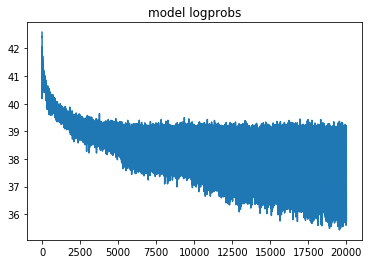

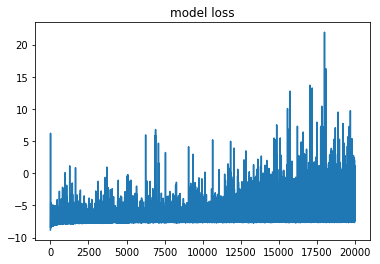

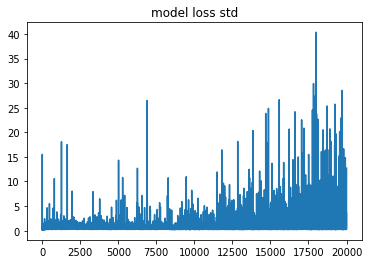

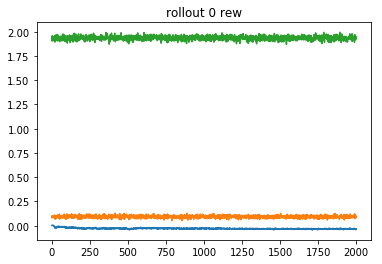

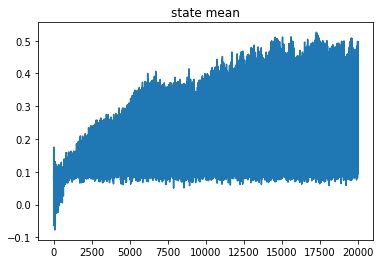

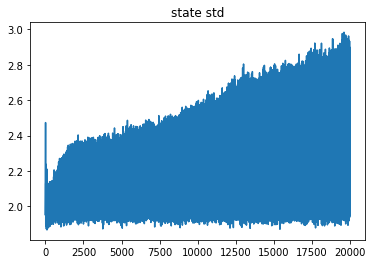

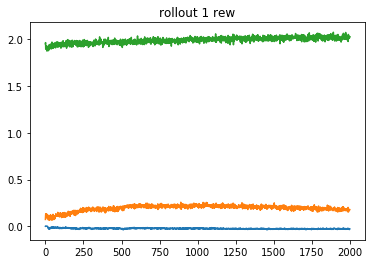

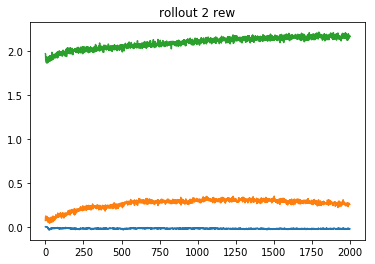

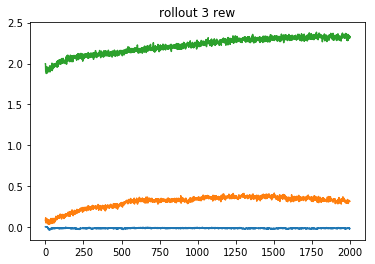

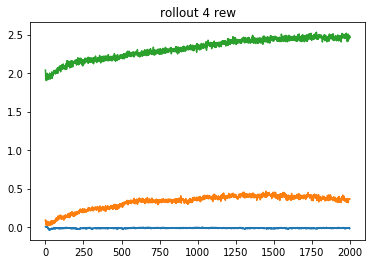

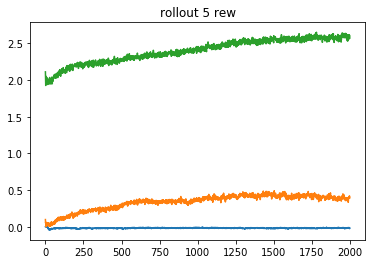

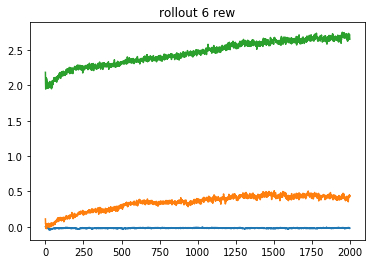

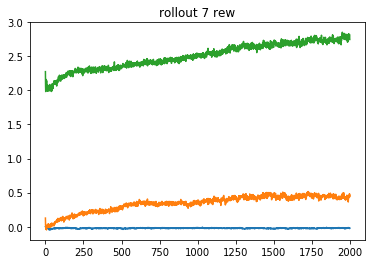

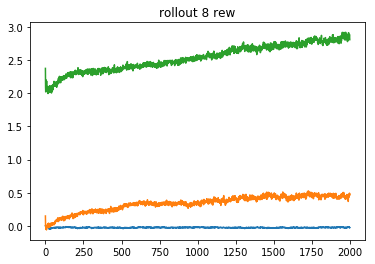

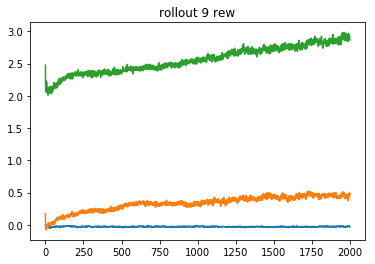

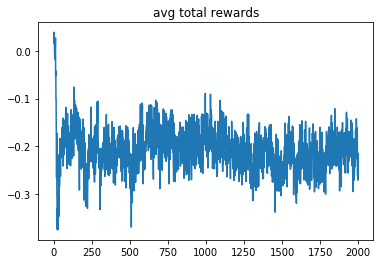

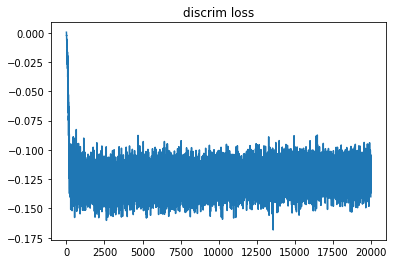

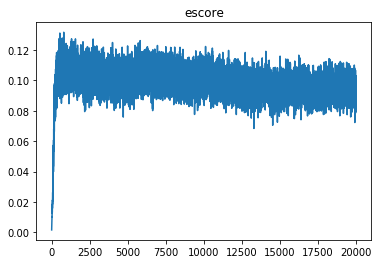

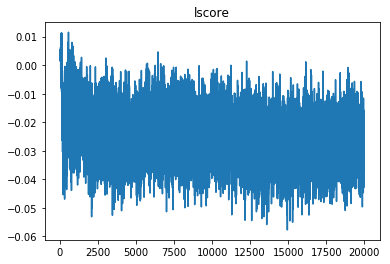

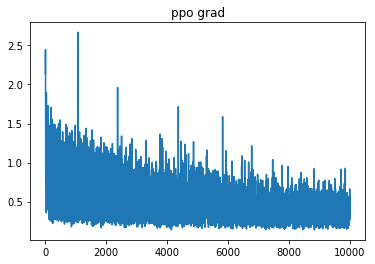

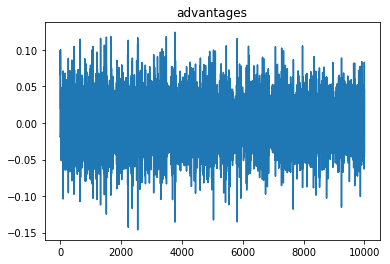

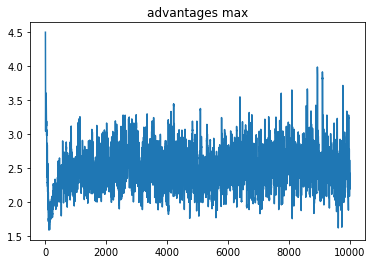

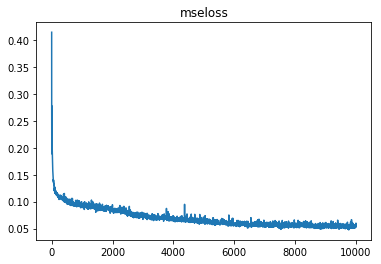

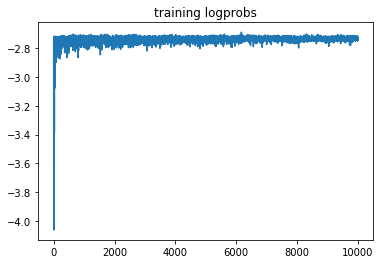

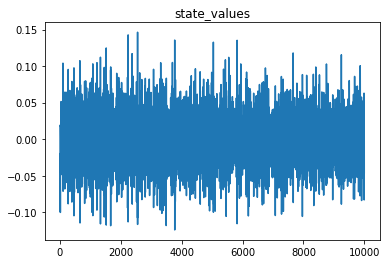

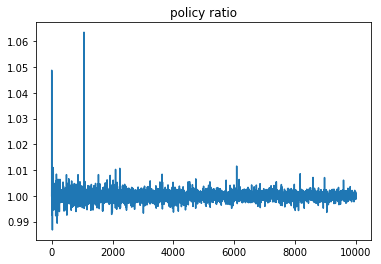

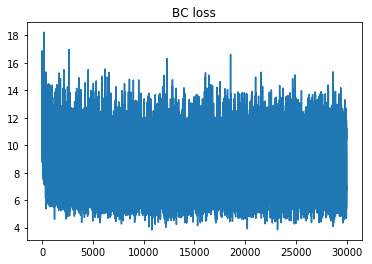

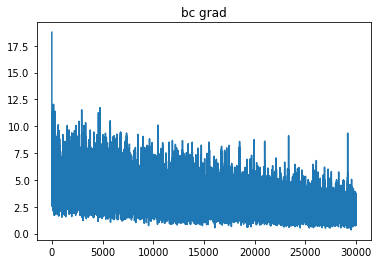

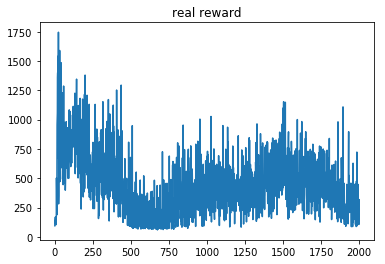

In [5]:
import matplotlib
matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt 
%matplotlib inline

for k,v in ppo.logger.dict.items():
    print(k, np.asarray(v).mean())
    plt.figure()
    plt.title(k)
    plt.plot(v)
    plt.title(k)

    #plt.show()